In [84]:
import matplotlib.pyplot as plt  
import pandas as pd 
import numpy as np 

In [85]:
df = pd.read_csv('placement.csv')

In [86]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

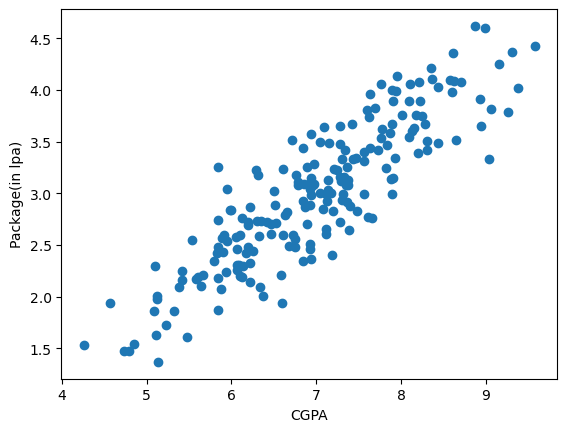

In [87]:
plt.scatter(df['cgpa'], df['package']) 
plt.xlabel('CGPA') 
plt.ylabel('Package(in lpa)')

In [90]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [91]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [92]:
from sklearn.model_selection import train_test_split 
X_train, X_test , y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
 lr = LinearRegression()

In [95]:
lr.fit(X_train, y_train)

LinearRegression()

In [96]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [97]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [98]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'Package(in lpa)')

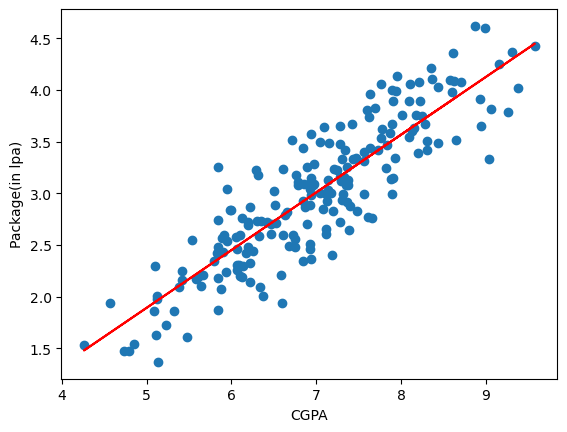

In [99]:
plt.scatter(df['cgpa'], df['package']) 
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA') 
plt.ylabel('Package(in lpa)')

In [100]:
m = lr.coef_
m

array([0.55795197])

In [101]:
b = lr.intercept_
b

-0.8961119222429144

In [42]:
# y = mx + b 
m * 8.58 + b

array([3.89111601])

In [44]:
m * 9.5 + b

array([4.40443183])

In [145]:
class MyLR: 

    def __init__(self): 
        self.m = None 
        self.b = None 

    def fit(self, X_train, y_train): 
         # print(X_train.shape) 
        num = 0 
        den = 0
        for i in range(X_train.shape[0]): 
           num = num + ( (X_train[i] - X_train.mean())*(y_train[i]-y_train.mean()))
           den = den + ( (X_train[i] - X_train.mean())* (X_train[i] - X_train.mean()))
        self.m = num/den 
        self.b = y_train.mean() - ( self.m * X_train.mean() )   
        print(self.m )
        print(self.b)
    def predict(self,X_test): 
        print(X_test)
        return (self.m * X_test) + self.b
        


In [104]:
import numpy as np 
import pandas as pd 

In [105]:
df = pd.read_csv('placement.csv')

In [106]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [107]:
x = df.iloc[:,0].values
y = df.iloc[:,1].values

In [108]:
x

array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
       6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
       6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
       5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
       8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
       5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
       8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
       4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
       6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
       8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
       6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
       5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
       4.85, 6.17, 5.84, 6.07, 5.66, 7.57, 8.28, 6.

In [109]:
y

array([3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6 , 2.48, 2.31, 3.51, 1.86,
       2.6 , 3.65, 2.89, 3.42, 3.23, 2.35, 2.09, 2.98, 2.83, 3.16, 2.93,
       2.3 , 2.48, 2.71, 3.65, 3.42, 2.16, 2.24, 3.49, 3.26, 3.89, 3.08,
       2.73, 3.42, 2.87, 2.84, 2.43, 4.36, 3.33, 4.02, 2.7 , 2.54, 2.76,
       1.86, 3.58, 2.26, 3.26, 4.09, 4.62, 4.43, 3.79, 4.11, 2.61, 3.09,
       3.39, 2.74, 1.94, 3.09, 3.31, 2.19, 1.61, 2.09, 4.25, 2.92, 3.81,
       1.63, 2.89, 2.99, 2.94, 2.35, 3.34, 3.62, 4.03, 3.44, 3.28, 3.15,
       4.6 , 2.21, 3.  , 3.44, 2.2 , 2.17, 3.49, 1.53, 1.48, 2.77, 3.55,
       1.48, 2.72, 2.66, 2.14, 4.  , 3.08, 2.42, 2.79, 2.61, 2.84, 3.83,
       3.24, 4.14, 3.52, 1.37, 3.  , 3.74, 2.82, 2.19, 2.59, 3.54, 4.06,
       3.76, 2.25, 4.1 , 2.37, 1.87, 4.21, 3.33, 2.99, 2.88, 2.65, 1.73,
       3.02, 2.01, 2.3 , 2.31, 3.16, 2.6 , 3.11, 3.34, 3.12, 2.49, 2.01,
       2.48, 2.58, 2.83, 2.6 , 2.1 , 3.13, 3.89, 2.4 , 3.15, 3.18, 3.04,
       1.54, 2.42, 2.18, 2.46, 2.21, 3.4 , 3.67, 2.

In [110]:
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test = train_test_split(x, y , test_size=0.2 , random_state=2)

In [111]:
X_train.shape

(160,)

In [112]:
lr = MyLR()

In [113]:
lr.fit(X_train, y_train)

0.5579519734250721
-0.8961119222429152


In [114]:
X_train[0]

7.14

In [115]:
X_train

array([7.14, 8.93, 5.42, 5.1 , 7.77, 6.76, 6.89, 6.68, 7.91, 7.89, 8.71,
       7.95, 6.61, 6.26, 6.53, 6.42, 5.11, 6.09, 6.93, 7.04, 5.94, 6.05,
       5.83, 5.95, 9.31, 5.58, 7.88, 6.13, 7.76, 4.85, 6.19, 8.6 , 6.07,
       7.18, 5.12, 7.39, 8.25, 8.28, 7.13, 7.35, 5.66, 5.99, 8.01, 7.14,
       6.34, 6.89, 5.42, 6.47, 7.69, 7.4 , 7.28, 5.95, 7.38, 6.93, 8.99,
       7.36, 7.08, 5.38, 7.56, 8.22, 5.84, 6.78, 7.19, 7.28, 6.79, 6.12,
       6.85, 8.2 , 6.84, 7.37, 6.22, 6.61, 5.23, 7.21, 6.85, 6.19, 7.3 ,
       6.17, 5.89, 8.09, 7.11, 4.26, 6.94, 5.98, 6.71, 7.33, 9.06, 6.1 ,
       5.48, 6.1 , 7.56, 7.29, 5.84, 7.48, 7.61, 5.79, 5.61, 7.34, 9.38,
       7.91, 6.94, 7.94, 8.31, 6.96, 6.93, 7.11, 8.44, 8.18, 6.66, 8.44,
       7.12, 6.3 , 5.84, 6.98, 7.63, 5.64, 7.43, 8.87, 7.84, 5.84, 9.58,
       8.37, 7.63, 6.31, 6.5 , 8.11, 6.07, 4.73, 7.3 , 6.51, 7.28, 6.92,
       6.35, 8.62, 7.05, 9.26, 6.33, 6.22, 6.94, 5.13, 8.13, 5.9 , 9.04,
       6.06, 7.57, 8.1 , 9.16, 5.84, 7.89, 6.63, 7.

In [116]:
X_train.mean()

6.989937500000001

In [146]:
mlr = MyLR()

In [147]:
mlr.fit(X_train,y_train)

0.5579519734250721
-0.8961119222429152


In [148]:
X_test

array([8.58, 7.15, 5.88, 6.22, 4.57, 4.79, 5.32, 6.86, 8.35, 6.87, 8.94,
       7.9 , 6.93, 5.91, 7.32, 7.82, 5.09, 7.42, 6.94, 7.73, 6.19, 7.28,
       6.73, 7.2 , 8.21, 6.75, 7.87, 7.6 , 8.63, 5.12, 8.15, 7.36, 8.31,
       6.6 , 6.59, 7.47, 7.93, 6.29, 6.37, 6.47])

In [149]:
print(mlr.predict(X_test[0]))

8.58
3.891116009744203


In [ ]:
# Matrics 


In [150]:
import matplotlib.pyplot as plt  
import pandas as pd 
import numpy as np 

In [151]:
df = pd.read_csv('placement.csv')

In [152]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package(in lpa)')

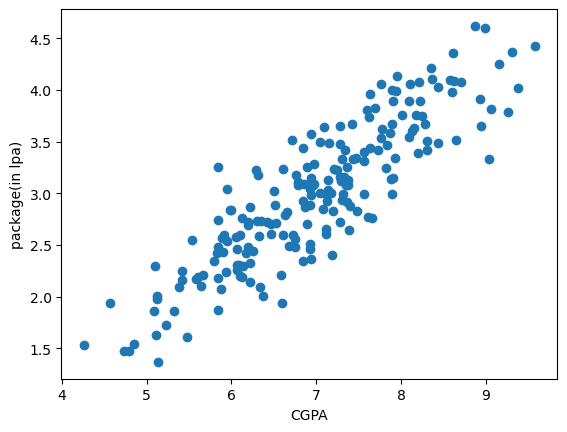

In [154]:
plt.scatter(df['cgpa'],df['package']) 
plt.xlabel("CGPA")
plt.ylabel('package(in lpa)') 

In [156]:
x = df.iloc[:,0:1] 
y = df.iloc[:,-1]

In [157]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [158]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [161]:
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [162]:
from sklearn.linear_model import LinearRegression 

In [163]:
lr = LinearRegression()

In [164]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package in lpa ')

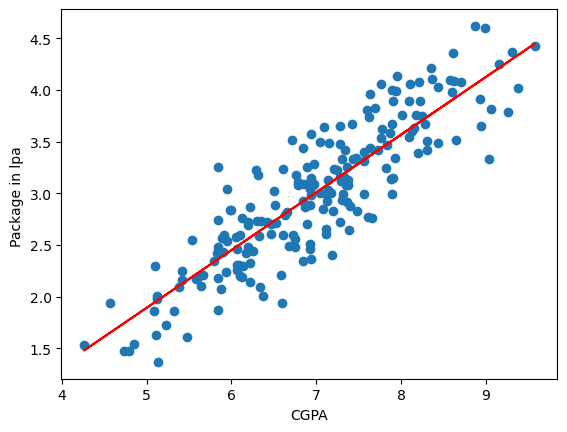

In [167]:
plt.scatter(df['cgpa'],df['package']) 
plt.plot(X_train, lr.predict(X_train), color='red') 
plt.xlabel("CGPA") 
plt.ylabel('Package in lpa ')

In [169]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score


In [172]:
y_pred = lr.predict(X_test)

In [171]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [173]:
print("MAE", mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [174]:
print("MSE", mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [175]:
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [179]:
print("R2 score", r2_score(y_test,y_pred)) 
r2 = r2_score(y_test,y_pred)

R2 score 0.780730147510384


In [180]:
#  Adjusted R2 score 
X_test.shape
# print("MAE", mean_absolute_error(y_test,y_pred))

(40, 1)

In [181]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [183]:
new_df1 = df.copy() 
new_df1['random_feature'] = np.random.random(200) 

new_df1 = new_df1[['cgpa','random_feature','package']] 
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.628099,3.26
1,5.12,0.522007,1.98
2,7.82,0.753279,3.25
3,7.42,0.314817,3.67
4,6.94,0.095137,3.57


Text(0, 0.5, 'package')

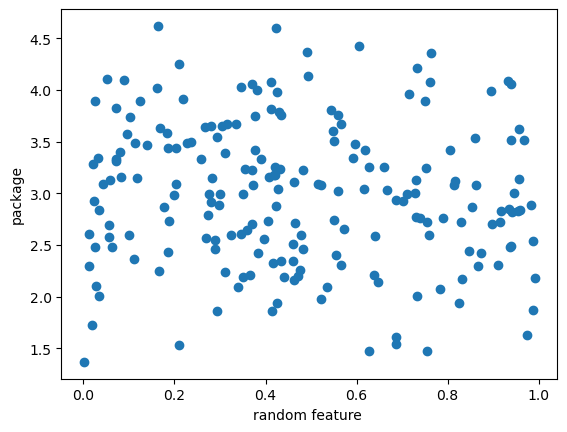

In [187]:
plt.scatter(new_df1['random_feature'],new_df1['package']) 
plt.xlabel('random feature ') 
plt.ylabel('package')

In [194]:
x = new_df1.iloc[:,0:2] 
y = new_df1.iloc[:,-1]

In [195]:
x

,cgpa,random_feature
0,6.89,0.628099
1,5.12,0.522007
2,7.82,0.753279
3,7.42,0.314817
4,6.94,0.095137
...,...,...
195,6.93,0.289955
196,5.89,0.268317
197,7.21,0.432302
198,7.63,0.714188


In [196]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [197]:
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [198]:
lr = LinearRegression()

In [199]:
lr.fit(X_train,y_train)

LinearRegression()

In [202]:
lr.predict(X_test)

array([3.92398648, 3.12649312, 2.35852673, 2.58131553, 1.62614125,
       1.76659294, 2.08098346, 2.97170505, 3.73692329, 2.96503366,
       4.10461228, 3.51900761, 2.92417323, 2.37743943, 3.1991939 ,
       3.44031485, 1.96426783, 3.25816398, 3.00997343, 3.42484254,
       2.59722658, 3.18339842, 2.85948948, 3.07696408, 3.68859993,
       2.87798937, 3.52051091, 3.33719515, 3.87432786, 1.94058134,
       3.67773466, 3.22798122, 3.7315908 , 2.79186916, 2.76675603,
       3.31191548, 3.51632843, 2.61437552, 2.70004218, 2.72696969])

In [203]:
y_pred = lr.predict(X_test)

In [207]:
print("R2 score", r2_score(y_test,y_pred)) 
r2 = r2_score(y_test,y_pred)

R2 score 0.7779117364650616


In [208]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7720673084773001

In [214]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [216]:
new_df2.sample(5)

,cgpa,iq,package
58,6.92,3.19,3.09
105,6.66,3.92,2.82
81,6.10,1.80,2.20
15,7.25,3.13,3.23
28,5.94,1.44,2.24


Text(0, 0.5, 'package')

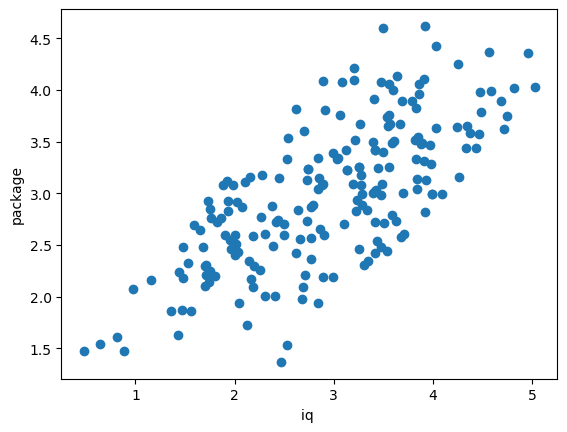

In [218]:
plt.scatter(new_df2['iq'],new_df2['package']) 
plt.xlabel('iq ') 
plt.ylabel('package')

In [219]:
np.random.randint(-100,100)

-90

In [228]:
x = new_df2.iloc[:,0:2] 
y = new_df2.iloc[:,-1]

In [229]:
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [230]:
lr = LinearRegression()

In [231]:
lr.fit(X_train,y_train)

LinearRegression()

In [232]:
lr.predict(X_test)

array([3.7593535 , 3.26818013, 2.08556335, 2.35363789, 1.8957716 ,
       1.49379846, 1.91647776, 2.92704653, 3.65895845, 2.75776447,
       4.16346852, 3.54101998, 3.0429972 , 2.31504931, 3.36513892,
       3.47358144, 1.85633935, 3.25715867, 2.93727826, 3.36354791,
       2.75342677, 3.25408453, 2.78647188, 3.15062689, 3.65376553,
       2.82928646, 3.69291271, 3.26111114, 3.71595723, 2.0286185 ,
       3.74355518, 2.96556962, 3.72588078, 2.63106585, 2.5566893 ,
       3.23071256, 3.39336479, 2.72384103, 2.60694653, 2.92695792])

In [234]:
y_pred = lr.predict(X_test)

In [235]:
print("R2 score", r2_score(y_test,y_pred)) 
r2 = r2_score(y_test,y_pred)

R2 score 0.8082062495754813


In [236]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.8031590456169413